In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets import cifar10

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
tf.__version__

'2.3.0'

## Dataset -- Cifar10

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [5]:
print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)

x_train shape:  (50000, 32, 32, 3)
x_test shape:  (10000, 32, 32, 3)


TypeError: ignored

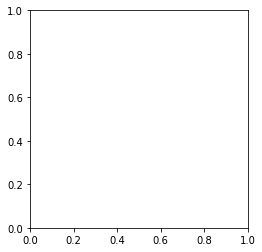

In [25]:
plt.imshow(x_train[1])
plt.show()

In [10]:
x_train[1].reshape(-1, 1).shape

(3072, 1)

In [11]:
y_train[1]

array([9], dtype=uint8)

In [ ]:
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

y_train shape:  (50000, 1)
y_test shape:  (10000, 1)


In [12]:
print(y_train[:10])

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]


[0 1 2 3 4 5 6 7 8 9]
[5000 5000 5000 5000 5000 5000 5000 5000 5000 5000]


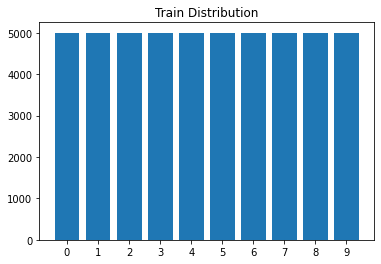

In [13]:
label, counts = np.unique(y_train, return_counts=True)
print(label)
print(counts)

plt.bar(label, counts, tick_label=label)
plt.title("Train Distribution")
plt.show()

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train,
                               test_size=0.2,
                               random_state=2,
                               stratify=y_train)

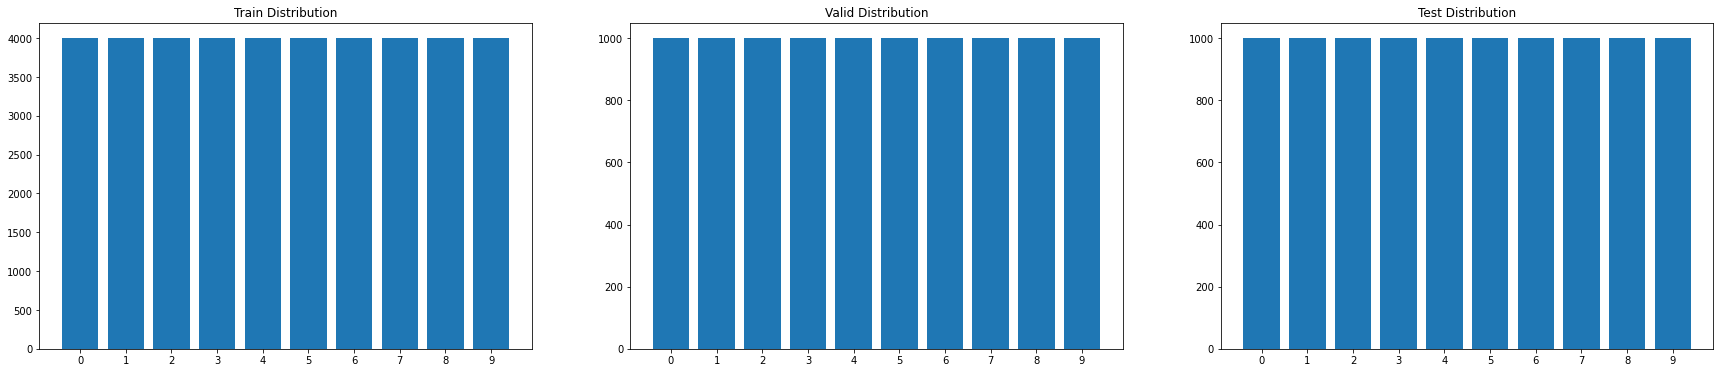

In [16]:
data_list = [y_train, y_valid, y_test]
data_types = ["Train", "Valid", "Test"]

plt.figure(figsize=(30, 6))
for i in range(3):
  label, counts = np.unique(data_list[i], return_counts=True)

  plt.subplot(1, 3, i+1)
  plt.bar(label, counts, tick_label=label)
  plt.title(data_types[i]+" Distribution")
plt.show()

## Data Preprocessing

In [17]:
print("x_train type: ", x_train.dtype)
print("x_train max: ", x_train.max())
print("x_train min: ", x_train.min())

x_train type:  uint8
x_train max:  255
x_train min:  0


#### min_max normalization

In [18]:
x_train = x_train.astype("float32")/255
x_valid = x_valid.astype("float32")/255
x_test = x_test.astype("float32")/255

In [19]:
print("x_train type: ", x_train.dtype)
print("x_train max: ", x_train.max())
print("x_train min: ", x_train.min())

x_train type:  float32
x_train max:  1.0
x_train min:  0.0


#### Reshape

In [20]:
print("x_train shape: ", x_train.shape)

x_train shape:  (40000, 32, 32, 3)


In [21]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_valid = x_valid.reshape(x_valid.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

In [22]:
print("x_train shape: ", x_train.shape)

x_train shape:  (40000, 3072)


#### Category -- One-Hot Encoding

In [26]:
from tensorflow.keras.utils import to_categorical

In [27]:
y_train_one = to_categorical(y_train)
y_valid_one = to_categorical(y_valid)
y_test_one = to_categorical(y_test)

In [28]:
print("y_train type: ", y_train.dtype)
print("y_train shape: ", y_train.shape)
print("preprocessing".center(30, "-"))
print("y_train_one type: ", y_train_one.dtype)
print("y_train_one shape: ", y_train_one.shape)

y_train type:  uint8
y_train shape:  (40000, 1)
--------preprocessing---------
y_train_one type:  float32
y_train_one shape:  (40000, 10)


In [29]:
y_train[:3]

array([[2],
       [2],
       [8]], dtype=uint8)

In [30]:
y_train_one[:3]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

## Modeling

In [31]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import layers
from tensorflow.keras import optimizers

In [60]:
x_train[0].shape

(3072,)

In [61]:

num_classes = y_train_one[0].shape[0]
num_classes

10

In [83]:
inputs = layers.Input(shape=x_train[0].shape)
x = layers.Dense(200, activation="relu")(inputs)

x = layers.Dense(50)(x)
x = layers.Activation("relu")(x)

x = layers.Dense(32)(x)
x = layers.Activation("relu")(x)

x = layers.Dense(16)(x)
x = layers.Activation("relu")(x)

outputs = layers.Dense(num_classes, activation="softmax")(x)


model = Model(inputs=inputs, outputs=outputs)

In [84]:
model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense_7 (Dense)              (None, 200)               614600    
_________________________________________________________________
dense_8 (Dense)              (None, 50)                10050     
_________________________________________________________________
activation_3 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)                1632      
_________________________________________________________________
activation_4 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 16)               

In [85]:
model_weight = model.variables
# model_weight = model.get_weights()

In [86]:
# model_weight

In [87]:
# model_weight[0].shape

In [88]:
from tensorflow.keras import callbacks

In [89]:
model_dir = './model-logs'
if not os.path.exists(model_dir):
  os.makedirs(model_dir)


modelfiles = model_dir + '/{}-best-model.h5'.format('basic_model')
model_mckp = callbacks.ModelCheckpoint(modelfiles,
                      monitor='val_accuracy',
                      save_best_only=True)

earlystop = callbacks.EarlyStopping(monitor='val_loss',
                    patience=3,
                    verbose=1)


callbacks_list = [model_mckp, earlystop]

In [90]:
lr = 0.001
optimizer = optimizers.Adam(lr, decay=True)
model.compile(loss='categorical_crossentropy', 
        optimizer=optimizer,
        metrics=['accuracy'])

In [91]:
num_epoch = 10
batch_size = 64
history = model.fit(x_train, y_train_one,
            batch_size=batch_size,
            epochs=num_epoch,
            validation_data=(x_valid, y_valid_one),
            callbacks=callbacks_list
            )

Epoch 1/10
625/625 [==============================] - 3s 4ms/step - loss: 2.2662 - accuracy: 0.1547 - val_loss: 2.2549 - val_accuracy: 0.1723
Epoch 2/10
625/625 [==============================] - 2s 4ms/step - loss: 2.2509 - accuracy: 0.1723 - val_loss: 2.2490 - val_accuracy: 0.1717
Epoch 3/10
625/625 [==============================] - 3s 4ms/step - loss: 2.2463 - accuracy: 0.1761 - val_loss: 2.2456 - val_accuracy: 0.1771
Epoch 4/10
625/625 [==============================] - 2s 4ms/step - loss: 2.2436 - accuracy: 0.1783 - val_loss: 2.2433 - val_accuracy: 0.1784
Epoch 5/10
625/625 [==============================] - 2s 4ms/step - loss: 2.2417 - accuracy: 0.1799 - val_loss: 2.2417 - val_accuracy: 0.1821
Epoch 6/10
625/625 [==============================] - 2s 4ms/step - loss: 2.2402 - accuracy: 0.1807 - val_loss: 2.2404 - val_accuracy: 0.1834
Epoch 7/10
625/625 [==============================] - 2s 4ms/step - loss: 2.2389 - accuracy: 0.1824 - val_loss: 2.2393 - val_accuracy: 0.1841
Epoch 

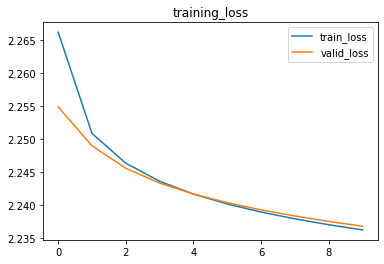

In [92]:
plt.plot(np.arange(num_epoch), history.history['loss'], label="train_loss")
plt.plot(np.arange(num_epoch), history.history['val_loss'], label="valid_loss")
plt.legend(loc='best')
plt.title('training_loss')
plt.show()

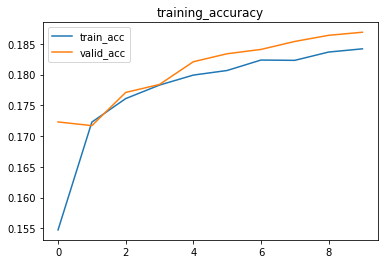

In [93]:
plt.plot(np.arange(num_epoch), history.history['accuracy'], label="train_acc")
plt.plot(np.arange(num_epoch), history.history['val_accuracy'], label="valid_acc")
plt.legend(loc='best')
plt.title('training_accuracy')
plt.show()

In [94]:
model.save("model_test.h5")

In [95]:
model = load_model("model_test.h5")

## Prediction

In [96]:
y_test_predprob = model.predict(x_test)
print(y_test_predprob[:3])

[[0.09684661 0.09125833 0.11651384 0.11049709 0.08683916 0.07685938
  0.11507905 0.11379337 0.09893947 0.0933737 ]
 [0.08330446 0.16027248 0.14598177 0.06655526 0.08300584 0.04552155
  0.04700525 0.07900716 0.10474462 0.1846017 ]
 [0.09059323 0.13526407 0.14277166 0.07070547 0.09464153 0.05391939
  0.05848307 0.08621316 0.11832645 0.149082  ]]


In [97]:
y_test_predprob.shape

(10000, 10)

In [98]:
y_test_predprob.shape

(10000, 10)

In [99]:
y_test_pred = y_test_predprob.argmax(-1)
print("y_test_pred shape: ", y_test_pred.shape)
print(y_test_pred[:3])

y_test_pred shape:  (10000,)
[2 9 9]


In [100]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [101]:
print(f"accuracy_score: {accuracy_score(y_test, y_test_pred):.3f}")
print("confusion matrix: \n", confusion_matrix(y_test, y_test_pred))

accuracy_score: 0.177
confusion matrix: 
 [[  8  42 385   9   0   0   0  59 348 149]
 [  2 108 467  51   0   0   0  14  84 274]
 [  3  15 712  65   0   0   3  32 121  49]
 [  3  33 651 173   0   0   8  41  33  58]
 [  1  13 771 109   0   0   2  23  42  39]
 [  2  12 699 177   0   0   2  39  39  30]
 [  0  20 742 177   0   0   1  17  10  33]
 [  3  25 679  75   0   0   1  55  40 122]
 [  2  90 288   9   0   0   0  33 257 321]
 [  5  91 330  27   0   0   1  16  72 458]]


In [102]:
import seaborn as sns

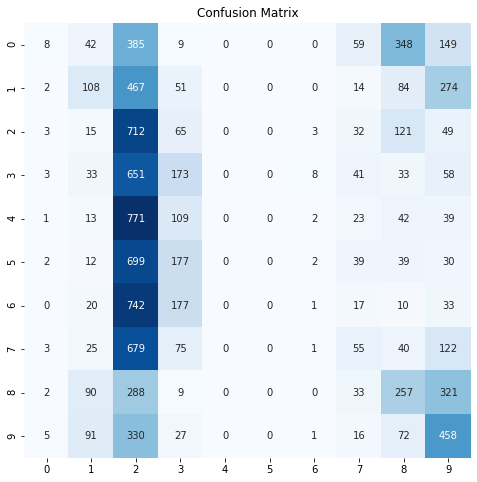

In [103]:
plt.figure(figsize=(8, 8))
sns.heatmap(confusion_matrix(y_test, y_test_pred), 
      cmap="Blues", annot=True, fmt="d", cbar=False)
plt.title("Confusion Matrix")
plt.show()